###Linear Regression Assignment

##Problem Statement
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike sharing dataset

In [239]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [240]:
import numpy as np
import pandas as pd

In [241]:
!pip show statsmodels

Name: statsmodels
Version: 0.10.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pandas, patsy, scipy
Required-by: plotnine


In [242]:
# Version of pandas library

!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


In [243]:
# Version of matplotlib library

!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, cycler, numpy, kiwisolver, pyparsing
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [244]:
# Version of seaborn library

!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pandas, matplotlib, scipy
Required-by: missingno


In [245]:
#Please add file path location of the day.csv data file
# replace the <location of the dataset> with the original location of dataset in the running system
sharedbike_location = "/content/sample_data/day.csv"
sharedbikesdf = pd.read_csv(sharedbike_location)

In [246]:
# Check the head of the dataset
sharedbikesdf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the shared bikes dataframe

In [247]:
sharedbikesdf.shape

(730, 16)

In [248]:
sharedbikesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The shape of the data is (730, 16) and there are no null values

##Step 2: Visualising and Cleaning the Data
Let's now spend some time doing what is arguably the most important step - understanding and cleaning the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where we'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [249]:
#dropping below irrelevent columns
#instant - It's a idex column
#dteday - date column so nt usefull for LR
#casual,registered- This belongs to target variable cnt = casual+registered
sharedbikesdf.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [250]:
sharedbikesdf.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [251]:
sharedbikesdf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

In [253]:
numericCols = ['temp','atemp','hum','windspeed','cnt']

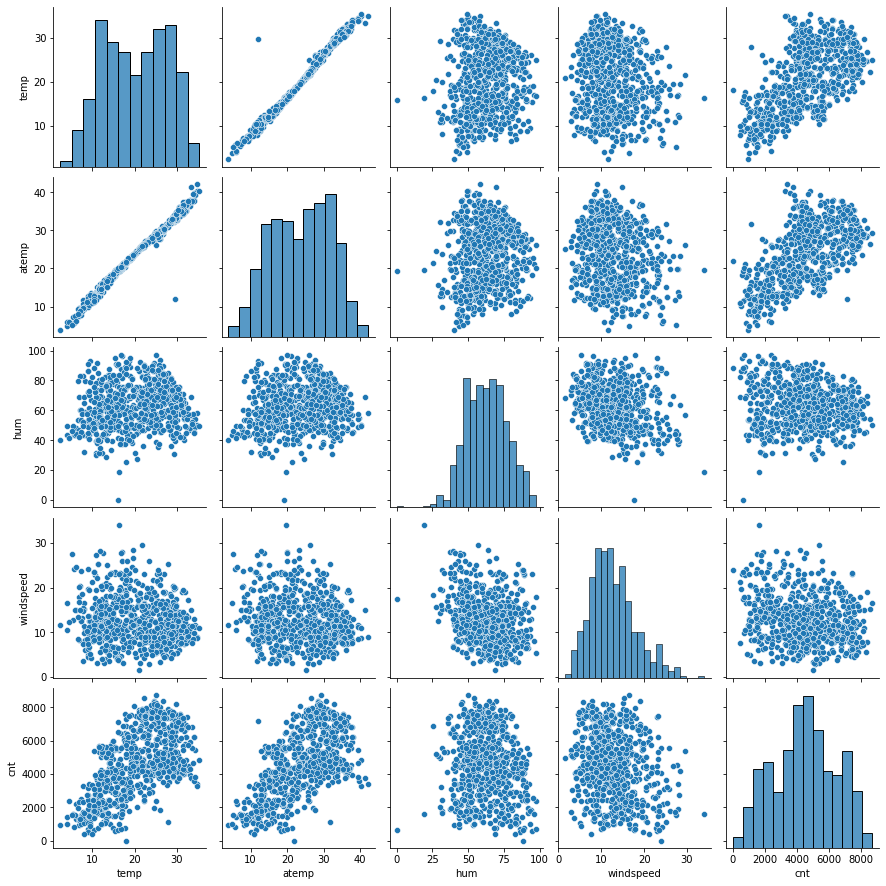

In [254]:
sns.pairplot(sharedbikesdf[numericCols])
plt.show()

We can infer by looking into the above plot that atemp and temp has good correlation with cnt

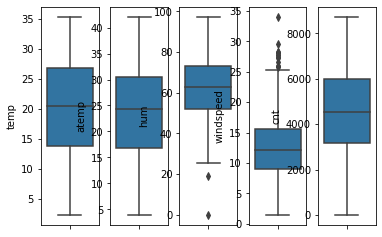

In [255]:
i=1
for col in numericCols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=sharedbikesdf)
    i+=1

#Bi-Variate Analysis
Analysing categorical variable with target variable

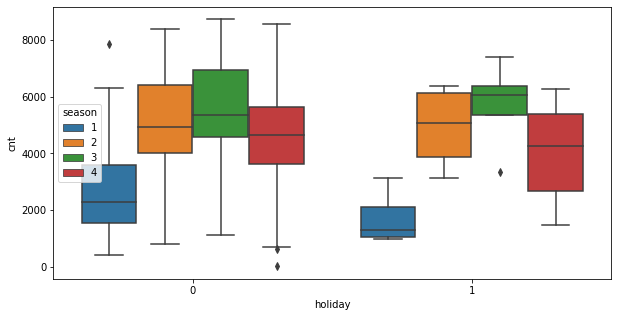

In [256]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'season', data = sharedbikesdf)
plt.show()

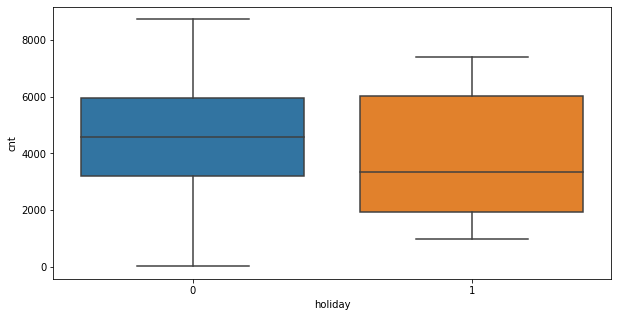

In [257]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'cnt', data = sharedbikesdf)
plt.show()

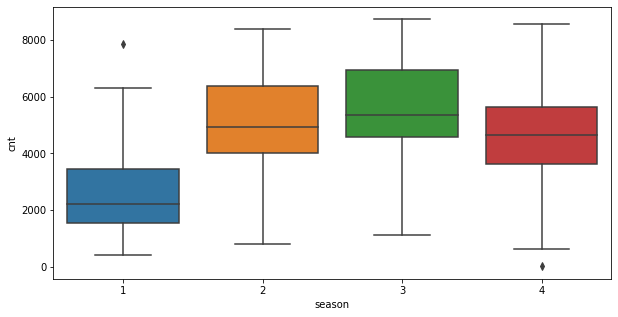

In [258]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', data = sharedbikesdf)
plt.show()

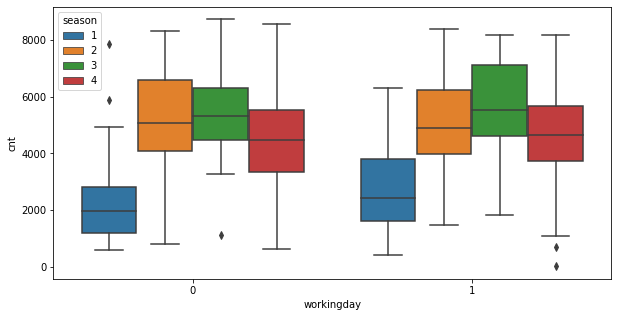

In [259]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'season', data = sharedbikesdf)
plt.show()

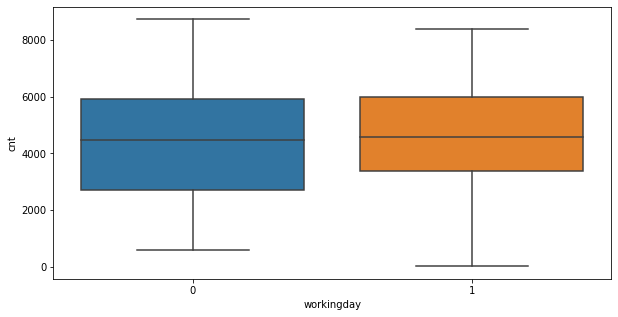

In [260]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = sharedbikesdf)
plt.show()

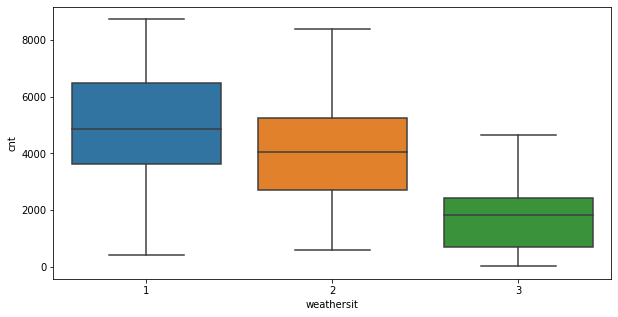

In [261]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', data = sharedbikesdf)
plt.show()

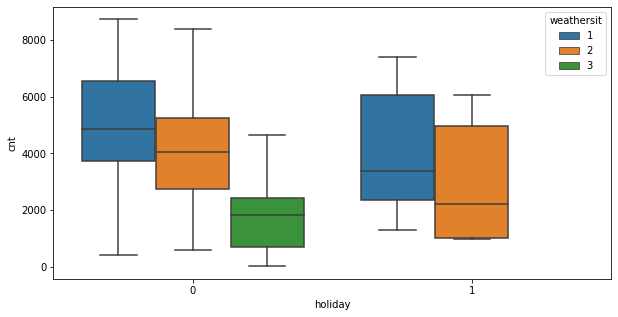

In [262]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'weathersit', data = sharedbikesdf)
plt.show()

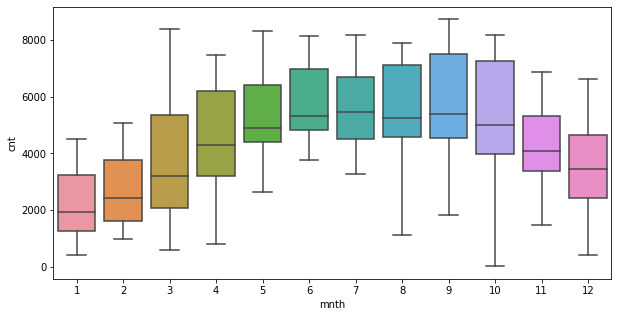

In [263]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = sharedbikesdf)
plt.show()

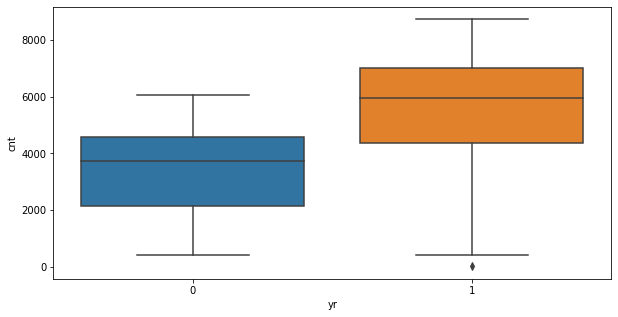

In [264]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'yr', y = 'cnt', data = sharedbikesdf)
plt.show()

By looking into the above analysis we can infer that Season 3(fall) is the best season for the demand and year wise the demand has grown. During light snow, light rain weathersit, demands falls. On holidays the demands is slightly on lower end compare to non holidays

##Step 3: Data Preparation

Let's convert the categorical variables season,weekday, mnth and weathersit to categorical types

In [265]:
sharedbikesdf['season'] = sharedbikesdf['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [266]:
sharedbikesdf['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [267]:
sharedbikesdf['weathersit'] = sharedbikesdf['weathersit'].map({1:'Clear', 2:'Mist', 3:'LightSnow', 4:'HeavyRain'})

In [268]:
sharedbikesdf['weathersit']

0       Mist
1       Mist
2      Clear
3      Clear
4      Clear
       ...  
725     Mist
726     Mist
727     Mist
728    Clear
729     Mist
Name: weathersit, Length: 730, dtype: object

In [269]:
sharedbikesdf['weekday'] = sharedbikesdf['weekday'].map({0:'Sun',1:'mon', 2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat'})

In [270]:
sharedbikesdf['weekday']

0        Sat
1        Sun
2        mon
3        Tue
4        Wed
       ...  
725    Thurs
726      Fri
727      Sat
728      Sun
729      mon
Name: weekday, Length: 730, dtype: object

In [271]:
sharedbikesdf['mnth'] = sharedbikesdf['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June',7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [272]:
sharedbikesdf['mnth']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [273]:
sharedbikesdf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


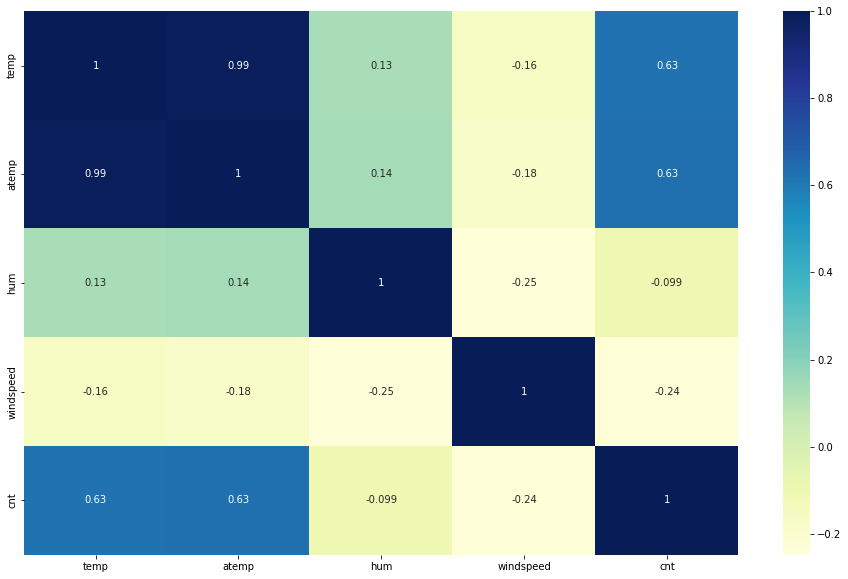

In [274]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(sharedbikesdf[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

##Dummy Variables

creating dummy variables for all categorical variables

In [275]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit'
weathersit = pd.get_dummies(sharedbikesdf['weathersit'])
sharedbikesdf = pd.concat([sharedbikesdf, weathersit], axis = 1)

In [276]:
# Check what the dataset sharedbikesdf looks like
sharedbikesdf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,1
2,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [277]:
# Drop 'weathersit' as we have created the dummies for it

sharedbikesdf.drop(['weathersit'], axis = 1, inplace = True)

In [278]:
# Check what the dataset 'sharedbikesdf' looks like
sharedbikesdf.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,Mist
0,spring,0,Jan,0,Sat,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1
1,spring,0,Jan,0,Sun,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1
2,spring,0,Jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [279]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday'
weekday = pd.get_dummies(sharedbikesdf['weekday'],drop_first=True)
sharedbikesdf = pd.concat([sharedbikesdf, weekday], axis = 1)

In [280]:
# Check what the dataset 'sharedbikesdf' looks like
sharedbikesdf.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,Mist,Sat,Sun,Thurs,Tue,Wed,mon
0,spring,0,Jan,0,Sat,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,1,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,0,0
2,spring,0,Jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0


In [281]:
# Drop 'weekday' as we have created the dummies for it

sharedbikesdf.drop(['weekday'], axis = 1, inplace = True)

In [282]:
# Check what the dataset 'sharedbikesdf' looks like
sharedbikesdf.head()

,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,Mist,Sat,Sun,Thurs,Tue,Wed,mon
0,spring,0,Jan,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,1,0,0,0,0,0
1,spring,0,Jan,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,0,0
2,spring,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0


In [283]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth'
mnth = pd.get_dummies(sharedbikesdf['mnth'],drop_first=True)
sharedbikesdf = pd.concat([sharedbikesdf, mnth], axis = 1)

In [284]:
# Check what the dataset 'sharedbikesdf' looks like
sharedbikesdf.head()

,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [285]:
# Drop 'mnth' as we have created the dummies for it

sharedbikesdf.drop(['mnth'], axis = 1, inplace = True)

In [286]:
# Check what the dataset 'sharedbikesdf' looks like
sharedbikesdf.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,...,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep
0,spring,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [287]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'
season = pd.get_dummies(sharedbikesdf['season'],drop_first=True)
sharedbikesdf = pd.concat([sharedbikesdf, season], axis = 1)

In [288]:
# Check what the dataset 'sharedbikesdf' looks like
sharedbikesdf.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,...,Jul,June,Mar,May,Nov,Oct,Sep,spring,summer,winter
0,spring,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,1,0,0
1,spring,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,1,0,0
2,spring,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [289]:
# Drop 'season' as we have created the dummies for it

sharedbikesdf.drop(['season'], axis = 1, inplace = True)

In [290]:
# Check what the dataset 'sharedbikesdf' looks like
sharedbikesdf.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Jul,June,Mar,May,Nov,Oct,Sep,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


##Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [291]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(sharedbikesdf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [292]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Jul,June,Mar,May,Nov,Oct,Sep,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,1,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,0,0,0,0,1,0


##Rescaling the Features
To make all features in same scale to interpret easily we will be scaling the numeric features with Min-Max scaling

In [293]:
from sklearn.preprocessing import MinMaxScaler

In [294]:
scaler = MinMaxScaler()

In [295]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [296]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Jul,June,Mar,May,Nov,Oct,Sep,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,1,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,0,...,0,0,0,0,0,0,0,0,1,0


In [297]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Jul,June,Mar,May,Nov,Oct,Sep,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.627451,0.029412,...,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.483958,0.169124,...,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [298]:
y_train = df_train.pop('cnt')
X_train = df_train

In [299]:
X_train.shape

(510, 30)

In [300]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Clear,LightSnow,Mist,...,Jul,June,Mar,May,Nov,Oct,Sep,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,1,0,0,...,0,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,1,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,...,0,0,0,0,0,0,0,0,1,0


##RFE
Recursive feature elimination

In [301]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [302]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [303]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Clear', True, 1),
 ('LightSnow', True, 1),
 ('Mist', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thurs', False, 12),
 ('Tue', False, 11),
 ('Wed', False, 14),
 ('mon', False, 10),
 ('Aug', False, 9),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('June', False, 16),
 ('Mar', False, 15),
 ('May', False, 8),
 ('Nov', False, 4),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [304]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Clear',
       'LightSnow', 'Mist', 'Sat', 'Sun', 'Jul', 'Sep', 'spring', 'winter'],
      dtype='object')

In [305]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Thurs', 'Tue', 'Wed', 'mon', 'Aug', 'Dec', 'Feb', 'Jan',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'summer'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [306]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [307]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_rfe)

In [308]:
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

In [309]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          3.81e-190
Time:                        19:29:13   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1104.8340    197.384      5.597      0.0

##Checking VIF

In [310]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [311]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
6,Clear,inf
7,LightSnow,inf
8,Mist,inf
9,Sat,inf
10,Sun,inf
3,temp,2.99
13,spring,2.55
4,hum,1.89


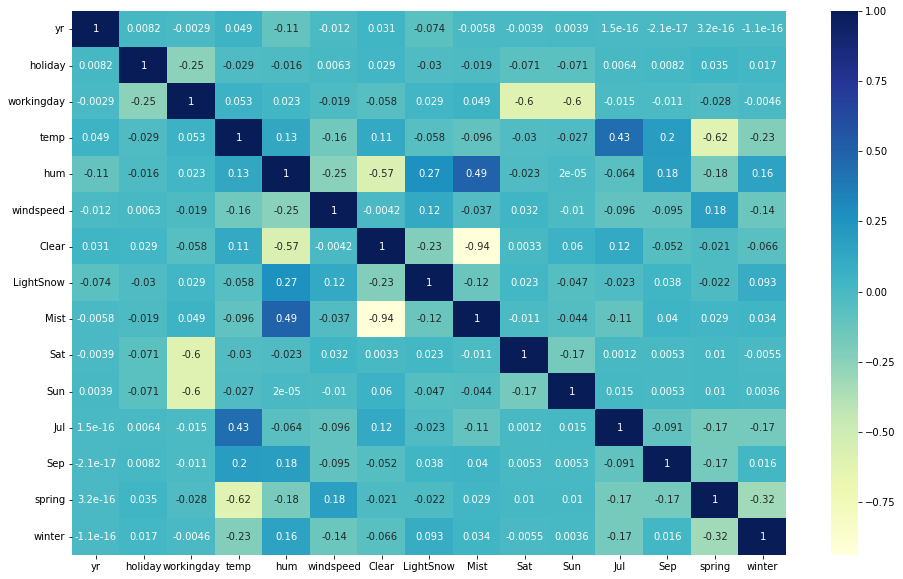

In [312]:
# Let's check the correlation coefficients of variables selected by RFE to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(sharedbikesdf[col].corr(), annot = True, cmap="YlGnBu")
plt.show()

Columns holiday has high p values so it can be dropped as it will be insignificant in presence of other variables;

Rebuilding the model without holiday

In [313]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [314]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [315]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [316]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          3.81e-190
Time:                        19:29:15   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        860.8058    284.222      3.029      0.0

In [317]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Clear,62.54
7,Mist,40.55
1,workingday,9.07
8,Sat,6.06
9,Sun,5.74
6,LightSnow,5.03
2,temp,2.99
12,spring,2.55
3,hum,1.89
13,winter,1.78


Column Clear weathersit has vary high VIF values so it can be dropped as it shows multi collinearity with other variables;

In [318]:
X_train_new = X_train_new.drop(["Clear"], axis = 1)

In [319]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [320]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [321]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          3.81e-190
Time:                        19:29:15   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2047.7906    345.860      5.921      0.0

In [322]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.19
2,temp,17.24
1,workingday,16.92
7,Sat,4.57
4,windspeed,4.52
8,Sun,4.45
11,spring,2.79
6,Mist,2.27
12,winter,2.15
0,yr,2.08


Column hum  has vary high VIF values so it can be dropped as it shows multi collinearity with other variables;

In [323]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [324]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [325]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [326]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          4.38e-188
Time:                        19:29:15   Log-Likelihood:                -4122.0
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     497   BIC:                             8325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1357.2105    301.242      4.505      0.0

In [327]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
6,Sat,3.76
7,Sun,3.53
10,spring,2.44
0,yr,2.07
11,winter,1.78
5,Mist,1.57
8,Jul,1.37


Column workingday  has vary high VIF values so it can be dropped as it shows multi collinearity with other variables;

In [328]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [329]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [330]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [331]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          7.06e-186
Time:                        19:29:15   Log-Likelihood:                -4130.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     498   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2234.7351    209.145     10.685      0.0

In [332]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
9,spring,1.66
4,Mist,1.51
10,winter,1.41
7,Jul,1.35
5,Sat,1.22
6,Sun,1.20
8,Sep,1.20


Column Sat has high p values so it can be dropped as it will be insignificant in presence of other variables;

In [333]:
X_train_new = X_train_new.drop(["Sat"], axis = 1)

In [334]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [335]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [336]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          1.06e-186
Time:                        19:29:15   Log-Likelihood:                -4131.0
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2259.3587    208.495     10.836      0.0

In [337]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
8,spring,1.65
4,Mist,1.51
9,winter,1.40
6,Jul,1.35
7,Sep,1.20
5,Sun,1.17
3,LightSnow,1.08


In [338]:
#lets fit the final model using sklearn
sklearnLR = LinearRegression()
sklearnLR.fit(X_train_new,y_train)
print(sklearnLR.intercept_,sklearnLR.coef_)

2259.3587045580293 [ 2037.64247625  3919.59594608 -1228.61802655 -2492.65674447
  -704.98016481  -386.42395636  -604.64923148   456.81906916
  -984.42591007   401.03062134]


Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, fall as it has a very high VIF of 9.08. Let's go ahead and drop this variables

##Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [339]:
y_train_pred = sklearnLR.predict(X_train_new)

In [340]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

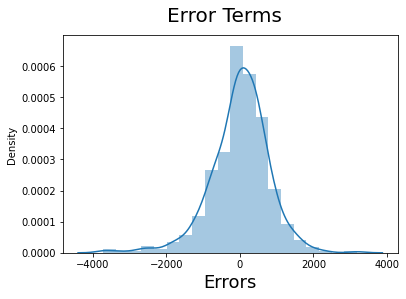

In [341]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

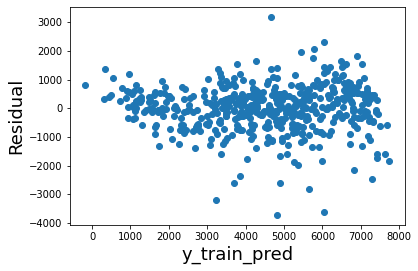

In [342]:
# Plot the patterns of the error terms
plt.scatter(y_train_pred,(y_train - y_train_pred))
plt.xlabel('y_train_pred', fontsize = 18)    
plt.ylabel('Residual', fontsize = 18)    
plt.show()

From above graph it's clear that errors are normally distribured and variance of the residuals is constant across predictions

##Making Predictions

In [343]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Jul,June,Mar,May,Nov,Oct,Sep,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,24.255828,61.961883,12.600130,4546.981735,0.652968,0.027397,...,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,7.689600,8.299641,14.456669,4.984858,1898.633630,0.477117,0.163612,...,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [344]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Jul,June,Mar,May,Nov,Oct,Sep,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,1,0,0,0,0,0,0,1,0


Applying the scaling on the test sets

In [345]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [346]:
y_test = df_test.pop('cnt')
X_test = df_test

In [347]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]



In [348]:
# Making predictions
y_pred = sklearnLR.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

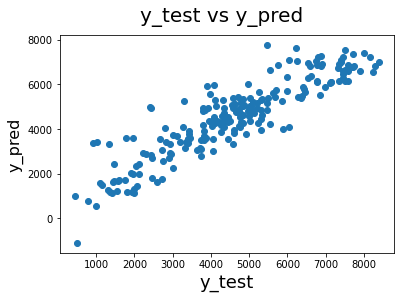

In [349]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#Calculating R-squared score

In [350]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8086992490628284

##Interpreting result

1. We have got good R- Square value of 0.81 for test data which is similar to training data
2. Residuals are normally distribured and variance of the residuals is constant across predictions
3. VIF of all the predictors are below 5
4. p-values are less than 0.05
#Below are the list of important predictors and interpretaion using their coefficient value

 1. temp - Demand has increased when temerature increases  
 2. windspeed - Demand has decreased when windspeed decreases 
 3. yr - 2019 has more demand of these bikes than 2018. So demand will increase if situation becomes normal
 4. spring - Demand has decreased in spring season. So comany can focus to improve demand in spring
 6. Mist - Demand has decreased in Mist weather.
 7. winter - Demand has increased in winter season 
 8. Jul - Demand has decreased in Jul month.
 9. Sep - Demand has increased in sept month  
 10. Sun - On sundays we see less demand for bikes
 11. LightSnow - Demand has decreased in LightSnow/Light Rain weather.